In [9]:
# import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [13]:
# load data set dan dimasukkan ke dalam variabel df, serta cek 5 data teratasnya
df=pd.read_csv('melb_data.csv')
df.head()

Suburb           Address  Rooms Type      Price Method SellerG  \
0  Abbotsford      85 Turner St      2    h  1480000.0      S  Biggin   
1  Abbotsford   25 Bloomburg St      2    h  1035000.0      S  Biggin   
2  Abbotsford      5 Charles St      3    h  1465000.0     SP  Biggin   
3  Abbotsford  40 Federation La      3    h   850000.0     PI  Biggin   
4  Abbotsford       55a Park St      4    h  1600000.0     VB  Nelson   

        Date  Distance  Postcode  ...  Bathroom  Car  Landsize  BuildingArea  \
0  3/12/2016       2.5    3067.0  ...       1.0  1.0     202.0           NaN   
1  4/02/2016       2.5    3067.0  ...       1.0  0.0     156.0          79.0   
2  4/03/2017       2.5    3067.0  ...       2.0  0.0     134.0         150.0   
3  4/03/2017       2.5    3067.0  ...       2.0  1.0      94.0           NaN   
4  4/06/2016       2.5    3067.0  ...       1.0  2.0     120.0         142.0   

   YearBuilt  CouncilArea Lattitude  Longtitude             Regionname  \
0        NaN        Yarra  -37.7996    144.9984  Northern Metropolitan   
1     1900.0        Yarra  -37.8079    144.9934  Northern Metropolitan   
2     1900.0        Yarra  -37.8093    144.9944  Northern Metropolitan   
3        NaN        Yarra  -37.7969    144.9969  Northern Metropolitan   
4     2014.0        Yarra  -37.8072    144.9941  Northern Metropolitan   

  Propertycount  
0        4019.0  
1        4019.0  
2        4019.0  
3        4019.0  
4        4019.0  

[5 rows x 21 columns]

In [18]:
# cek apakah dalam dataset tersebut ada data na nya
df.isna().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [19]:
# drop data na
df = df.dropna()

In [20]:
# cek kembali apakah dalam dataset tersebut masih ada data na nya
df.isna().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

In [ ]:
# Saat dicek, ada data pada feature Landsize yang bernilai 0. Karena Landsize tidak mungkin bernilai 0, maka saya putuskan untuk me-replace data 0 tersebut menjadi data rata-rata Landsize
df['Landsize'] = df['Landsize'].replace(0,df['Landsize'].mean())

### 1. Untuk feature/column Landsize & Price, hitung dan beri penjelasan (insight) terkait:
Titik Pusat Data (Central Tendency)

Persebaran Data (Dispersion)

Distribusi Data (Distribution)

In [49]:
# Titik Pusat Data (Central Tendency) dari Price
print('Titik Pusat Data (Central Tendency) dari Price')
print(f'Mean price-nya adalah {df["Price"].mean()}')
print(f'Median price-nya adalah {df["Price"].median()}')
print(f'Mode price-nya adalah {df["Price"].mode()}')
print(f'Berdasarkan data di atas dapat kita lihat bahwa Median dan Mean Price tidak berada di tengah-tengah data, Mode nya pun jauh dari data tertinggi maupun terrendahnya. Kita dapat membandingkan ketiga nilai tersebut dengan nilai terrendah dari feature Price yaitu {df["Price"].min()} dan nilai tertinggi dari feature Price yaitu {df["Price"].max()}, dapat kita simpulkan bahwa kemungkinan besar feature Price tidak normal')


Titik Pusat Data (Central Tendency) dari Price
Mean price-nya adalah 1068828.202065849
Median price-nya adalah 880000.0
Mode price-nya adalah 0    600000.0
dtype: float64
Berdasarkan data di atas dapat kita lihat bahwa Median dan Mean Price tidak berada di tengah-tengah data, Mode nya pun jauh dari data tertinggi maupun terrendahnya. Kita dapat membandingkan ketiga nilai tersebut dengan nilai terrendah dari feature Price yaitu 131000.0 dan nilai tertinggi dari feature Price yaitu 9000000.0, dapat kita simpulkan bahwa kemungkinan besar feature Price tidak normal


In [52]:
# Persebaran Data (Dispersion) dari Price
print('Persebaran Data (Dispersion) dari Price')
print(f'Variance dari price adalah {df["Price"].var()}')
print(f'Standard deviasi dari price adalah {df["Price"].std()}')
print('Berdasarkan nilai standard deviasi di atas yang bernilai relatif besar (apalagi jika dibandingkan dengan Central Tendency-nya), dapat kita simpulkan bahwa variasi data dari feature Price tersebar dan variatif')

Persebaran Data (Dispersion) dari Price
Variance dari price adalah 455836201596.7061
Standard deviasi dari price adalah 675156.4275015873
Berdasarkan nilai standard deviasi di atas yang bernilai relatif besar (apalagi jika dibandingkan dengan Central Tendency-nya), dapat kita simpulkan bahwa variasi data dari feature Price tersebar dan variatif


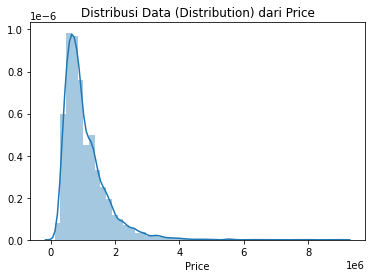

Berdasarkan grafik di atas, dapat kita lihat bahwa harga-harga Real Estate paling banyak ada di (kira-kira) kisaran range harga di antara 500.000 hingga 1.500.000


<Figure size 432x288 with 0 Axes>

In [127]:
# Distribusi Data (Distribution) dari Price
sns.distplot(df['Price'])
plt.title('Distribusi Data (Distribution) dari Price')
plt.show()
# Berdasarkan grafik di atas, dapat kita lihat bahwa harga-harga Real Estate paling banyak ada di (kira-kira) kisaran range harga di antara 500.000 hingga 1.500.000
plt.savefig('1.png')

In [53]:
# Titik Pusat Data (Central Tendency) dari Landsize
print('Titik Pusat Data (Central Tendency) dari Landsize')
print(f'Mean Landsize-nya adalah {df["Landsize"].mean()}')
print(f'Median Landsize-nya adalah {df["Landsize"].median()}')
print(f'Mode Landsize-nya adalah {df["Landsize"].mode()}')
print(f'Berdasarkan data di atas dapat kita lihat bahwa Median dan Mean Landsize juga tidak berada di tengah-tengah data, Mode nya pun jauh dari data tertinggi maupun terrendahnya. Kita dapat membandingkan ketiga nilai tersebut dengan nilai terrendah dari feature Landsize yaitu {df["Landsize"].min()} dan nilai tertinggi dari feature Landsize yaitu {df["Landsize"].max()}, dapat kita simpulkan bahwa kemungkinan besar feature Landsize tidak normal')

Titik Pusat Data (Central Tendency) dari Landsize
Mean Landsize-nya adalah 548.1651136314838
Median Landsize-nya adalah 471.00693996126535
Mode Landsize-nya adalah 0    471.00694
dtype: float64
Berdasarkan data di atas dapat kita lihat bahwa Median dan Mean Landsize juga tidak berada di tengah-tengah data, Mode nya pun jauh dari data tertinggi maupun terrendahnya. Kita dapat membandingkan ketiga nilai tersebut dengan nilai terrendah dari feature Landsize yaitu 1.0 dan nilai tertinggi dari feature Landsize yaitu 37000.0, dapat kita simpulkan bahwa kemungkinan besar feature Landsize tidak normal


In [55]:
# Persebaran Data (Dispersion) dari Landsize
print('Persebaran Data (Dispersion) dari Landsize')
print(f'Variance dari landsize adalah {df["Landsize"].var()}')
print(f'Standard deviasi dari landsize adalah {df["Landsize"].std()}')
print('Berdasarkan nilai standard deviasi di atas yang bernilai relatif besar (apalagi jika dibandingkan dengan Central Tendency-nya), dapat kita simpulkan bahwa variasi data dari feature Landsize tersebar dan variatif')

Persebaran Data (Dispersion) dari Landsize
Variance dari landsize adalah 763114.0417021847
Standard deviasi dari landsize adalah 873.5639883272345
Berdasarkan nilai standard deviasi di atas yang bernilai relatif besar (apalagi jika dibandingkan dengan Central Tendency-nya), dapat kita simpulkan bahwa variasi data dari feature Landsize tersebar dan variatif


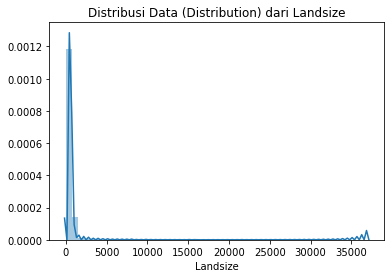

Berdasarkan grafik di atas, dapat kita lihat bahwa Landsize Real Estate paling banyak ada di (kira-kira) kisaran range 100 - 1000


<Figure size 432x288 with 0 Axes>

In [128]:
# Distribusi Data (Distribution) dari Landsize
sns.distplot(df['Landsize'])
plt.title('Distribusi Data (Distribution) dari Landsize')
plt.show()
print('Berdasarkan grafik di atas, dapat kita lihat bahwa Landsize Real Estate paling banyak ada di (kira-kira) kisaran range 100 - 1000')
plt.savefig('2.png')

### 2. Carilah data outlier dan beri penjelasan (insight) pada feature/column Distance ! Tambahkan plot untuk menampilkan adanya data outlier!

In [66]:
def find_anomalies(data):
    anomalies = []
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    limit = iqr*1.5
    print(f'IQR: {iqr}')

    limit_bawah = q1 - limit
    limit_atas = q3 + limit
    print(f'limit_bawah: {limit_bawah}')
    print(f'limit_atas: {limit_atas}')

    for outlier in data:
        if outlier < limit_bawah or outlier > limit_atas:
            anomalies.append(outlier)
            counter = (len(anomalies))
    print(f'total anomalies: {counter}')
    print(f'anomalies: {anomalies}')        
    return anomalies

In [67]:
find_anomalies(df['Distance'])

IQR: 6.5
limit_bawah: -3.8499999999999996
limit_atas: 22.15
total anomalies: 204
anomalies: [23.2, 23.0, 23.0, 24.7, 25.9, 36.9, 38.0, 45.9, 45.2, 25.2, 31.7, 31.7, 25.9, 23.5, 35.4, 31.7, 31.7, 27.2, 23.2, 23.2, 23.2, 27.0, 25.0, 25.0, 31.2, 31.2, 27.0, 24.7, 24.7, 24.7, 22.2, 28.8, 38.0, 36.9, 25.2, 29.8, 31.7, 26.5, 26.5, 35.4, 31.7, 23.2, 23.2, 23.2, 35.2, 34.9, 23.0, 22.2, 24.8, 45.9, 32.3, 31.7, 26.5, 23.5, 34.7, 31.7, 39.8, 35.2, 27.0, 23.0, 22.2, 22.2, 38.0, 31.7, 31.6, 22.7, 47.4, 23.5, 34.7, 23.2, 35.2, 34.9, 27.1, 23.0, 23.0, 23.0, 22.2, 27.0, 27.0, 24.8, 25.2, 23.3, 31.7, 29.8, 31.7, 22.7, 22.7, 22.7, 35.4, 31.7, 25.5, 23.2, 35.2, 35.2, 25.0, 25.0, 34.9, 23.0, 23.0, 23.0, 23.0, 24.7, 22.2, 27.0, 24.8, 38.0, 38.0, 33.3, 31.7, 31.7, 28.8, 26.5, 23.5, 23.5, 35.4, 31.7, 31.7, 27.0, 27.2, 34.9, 23.0, 23.0, 27.7, 45.9, 26.1, 31.7, 31.7, 25.9, 22.2, 27.2, 23.2, 25.0, 25.0, 31.2, 34.9, 23.0, 22.2, 22.2, 22.2, 28.5, 24.8, 24.8, 38.0, 38.0, 45.9, 25.2, 29.8, 29.8, 34.1, 47.3, 23.5, 2

[23.2,
 23.0,
 23.0,
 24.7,
 25.9,
 36.9,
 38.0,
 45.9,
 45.2,
 25.2,
 31.7,
 31.7,
 25.9,
 23.5,
 35.4,
 31.7,
 31.7,
 27.2,
 23.2,
 23.2,
 23.2,
 27.0,
 25.0,
 25.0,
 31.2,
 31.2,
 27.0,
 24.7,
 24.7,
 24.7,
 22.2,
 28.8,
 38.0,
 36.9,
 25.2,
 29.8,
 31.7,
 26.5,
 26.5,
 35.4,
 31.7,
 23.2,
 23.2,
 23.2,
 35.2,
 34.9,
 23.0,
 22.2,
 24.8,
 45.9,
 32.3,
 31.7,
 26.5,
 23.5,
 34.7,
 31.7,
 39.8,
 35.2,
 27.0,
 23.0,
 22.2,
 22.2,
 38.0,
 31.7,
 31.6,
 22.7,
 47.4,
 23.5,
 34.7,
 23.2,
 35.2,
 34.9,
 27.1,
 23.0,
 23.0,
 23.0,
 22.2,
 27.0,
 27.0,
 24.8,
 25.2,
 23.3,
 31.7,
 29.8,
 31.7,
 22.7,
 22.7,
 22.7,
 35.4,
 31.7,
 25.5,
 23.2,
 35.2,
 35.2,
 25.0,
 25.0,
 34.9,
 23.0,
 23.0,
 23.0,
 23.0,
 24.7,
 22.2,
 27.0,
 24.8,
 38.0,
 38.0,
 33.3,
 31.7,
 31.7,
 28.8,
 26.5,
 23.5,
 23.5,
 35.4,
 31.7,
 31.7,
 27.0,
 27.2,
 34.9,
 23.0,
 23.0,
 27.7,
 45.9,
 26.1,
 31.7,
 31.7,
 25.9,
 22.2,
 27.2,
 23.2,
 25.0,
 25.0,
 31.2,
 34.9,
 23.0,
 22.2,
 22.2,
 22.2,
 28.5,
 24.8,
 24.8,
 38.0,

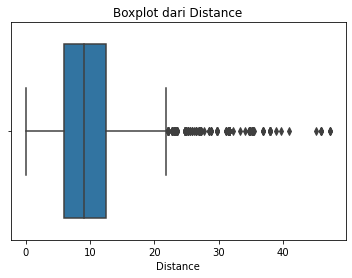

Berdasarkan perhitungan dan grafik di atas, ada 204 property yang merupakan outlier. Outlier dalam feature ini memiliki makna bahwa ke 204 property tersebut memiliki jarak yang cukup jauh dari CBD (Central Business District) sehingga tidak disarankan untuk membeli property yang merupakan outlier karena jaraknya yang jauh


<Figure size 432x288 with 0 Axes>

In [129]:
sns.boxplot(df['Distance'])
plt.title('Boxplot dari Distance')
plt.show()
print('Berdasarkan perhitungan dan grafik di atas, ada 204 property yang merupakan outlier. Outlier dalam feature ini memiliki makna bahwa ke 204 property tersebut memiliki jarak yang cukup jauh dari CBD (Central Business District) sehingga tidak disarankan untuk membeli property yang merupakan outlier karena jaraknya yang jauh')
plt.savefig('3.png')

### 3. Tampilkan distribusi (sebaran data) dalam bentuk plot yang tepat, untuk feature/column YearBuilt. Jelaskan insight apa yang Anda dapatkan di setiap plot tersebut!

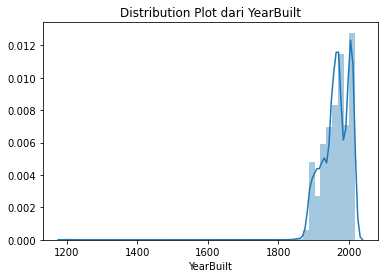

Berdasarkan grafik di atas, dapat kita lihat bahwa property yang paling banyak dibangun adalah property pada (kira-kira) sekitaran tahun 1950 - 1970 dan 1980 - 2010. Insight untuk konsumen: akan lebih mudah untuk mencari property yang di bangun pada (kira-kira) sekitaran tahun 1950 - 1970 dan 1980 - 2010 karena jumlahnya yang cukup banyak jika di bandingkan dengan property yang dibangun pada tahun 1840


<Figure size 432x288 with 0 Axes>

In [130]:
# Distribusi Data (Distribution)
sns.distplot(df['YearBuilt'])
plt.title('Distribution Plot dari YearBuilt')
plt.show()
print('Berdasarkan grafik di atas, dapat kita lihat bahwa property yang paling banyak dibangun adalah property pada (kira-kira) sekitaran tahun 1950 - 1970 dan 1980 - 2010. Insight untuk konsumen: akan lebih mudah untuk mencari property yang di bangun pada (kira-kira) sekitaran tahun 1950 - 1970 dan 1980 - 2010 karena jumlahnya yang cukup banyak jika di bandingkan dengan property yang dibangun pada tahun 1840')
plt.savefig('4.png')

### 4. Tampilkan perkembangan rata-rata harga (Price) rumah berdasarkan tahun pembangunan rumah (Year) menggunakan plot yang tepat! Jelaskan (insight) perkembangan rata-rata harga rumah dari plot yang Anda buat!

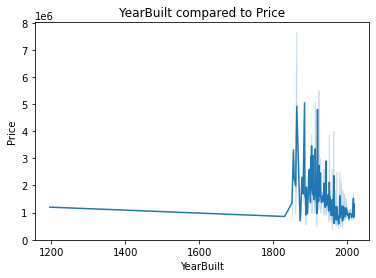

Berdasarkan grafik di atas, dapat kita lihat bahwa semakin tua property-nya maka rata-rata harganya akan relatif semakin mahal jika dibandingkan dengan property yang baru dibuat. Property yang dibangun pada sekitaran tahun 1850 - 1950 memiliki rata-rata harga yang relatif lebih mahal jika dibandingkan dengan property yang baru dibangun pada tahun 2000an. Insight untuk konsumen: Jika ingin membeli property dengan harga terjangkau, maka belilah property yang dibuat pada tahun 2000an hingga saat ini


<Figure size 432x288 with 0 Axes>

In [131]:
sns.lineplot(x = 'YearBuilt', y='Price', data= df)
plt.title('YearBuilt compared to Price')
plt.show()
print('Berdasarkan grafik di atas, dapat kita lihat bahwa semakin tua property-nya maka rata-rata harganya akan relatif semakin mahal jika dibandingkan dengan property yang baru dibuat. Property yang dibangun pada sekitaran tahun 1850 - 1950 memiliki rata-rata harga yang relatif lebih mahal jika dibandingkan dengan property yang baru dibangun pada tahun 2000an. Insight untuk konsumen: Jika ingin membeli property dengan harga terjangkau, maka belilah property yang dibuat pada tahun 2000an hingga saat ini')
plt.savefig('5.png')

### 5. Di antara Landsize, Distance, & Rooms, manakah feature/column yang memiliki nilai korelasi tertinggi pada feature/column Price? Jelaskan metode korelasi apa yang Anda gunakan, serta apa insight untuk perusahaan setelah mengetahui nilai korelasi tersebut?

In [92]:
df[['Landsize','Distance','Rooms','Price']].corr(method='spearman')
# saya menggunakan metode korelasi spearman karena datanya memiliki distribusi tidak normal

Landsize  Distance     Rooms     Price
Landsize  1.000000  0.296284  0.315974  0.139846
Distance  0.296284  1.000000  0.336033 -0.117274
Rooms     0.315974  0.336033  1.000000  0.591448
Price     0.139846 -0.117274  0.591448  1.000000

In [110]:
print('Berdasarkan tabel korelasi di atas, kita dapat lihat bahwa di antara feature Landsize, Distance, dan Rooms, feature Rooms lah yang memiliki korelasi paling tinggi. Insight untuk perusahaan: jika ingin menjual property dengan harga yang lebih tinggi, maka buat/juallah property dengan banyak kamar/rooms karena semakin banyak kamar maka akan semakin tinggi juga harga nya')

Berdasarkan tabel korelasi di atas, kita dapat lihat bahwa di antara feature Landsize, Distance, dan Rooms, feature Rooms lah yang memiliki korelasi paling tinggi. Insight untuk perusahaan: jika ingin menjual property dengan harga yang lebih tinggi, maka buat/juallah property dengan banyak kamar/rooms karena semakin banyak kamar maka akan semakin tinggi juga harga nya


### 6. Temukan RegionName yang rata-rata harga (Price) propertinya paling tinggi, serta tampilkan RegionName dan rata-rata harga rumah dalam bentuk Barplot! Lalu, di region yang memiliki rata-rata harga properti tertinggi, carilah:

In [103]:
df.groupby('Regionname').mean().sort_values(by='Price', ascending=False).head()['Price']

Regionname
Southern Metropolitan         1.378654e+06
Eastern Metropolitan          1.110341e+06
South-Eastern Metropolitan    9.304847e+05
Northern Metropolitan         8.722635e+05
Western Metropolitan          8.675011e+05
Name: Price, dtype: float64

In [104]:
print('Berdasarkan perhitungan di atas, Regionname yang memiliki rata-rata harga (Price) propertynya paling tinggi adalah Southern Metropolitan')

Berdasarkan perhitungan di atas, Regionname yang memiliki rata-rata harga (Price) propertynya paling tinggi adalah Southern Metropolitan


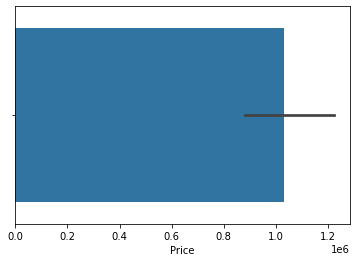

In [132]:
sns.barplot(df.groupby('Regionname').mean().sort_values(by='Price', ascending=False).head()['Price'])
plt.savefig('6.png')

In [122]:
df[df.groupby('Regionname').mean().sort_values(by='Price', ascending=False).head(1)][['CouncilArea','Type',]]

CouncilArea Type
1             NaN  NaN
2             NaN  NaN
4             NaN  NaN
6             NaN  NaN
7             NaN  NaN
...           ...  ...
12205         NaN  NaN
12206         NaN  NaN
12207         NaN  NaN
12209         NaN  NaN
12212         NaN  NaN

[6196 rows x 2 columns]